### Single Layer Perceptron from scratch

- Permasalahan yang akan coba diselesaikan tentang *binary classification* logika AND

| A | B | Out |
|---|---|-----|
| 1 | 1 | 1   |
| 1 | 0 | 0   |
| 0 | 1 | 0   |
| 0 | 0 | 0   |

#### Learning SLP :

1. Preparasi data
2. Inisialisasi hyperparameter \
$w, b , η$
3. Itrasi fungsi berikut sampai $Δw$ <= threshold, \
\
untuk tiap input data $x$ dengan target $t$, \
&emsp;&emsp;$y = \sum_ {}{}{x w} + b$ \
\
&emsp;&emsp;apply activation function (sigmoid) : \
&emsp;&emsp;$f(x) = \frac{1}{1+e^{-x}} $\
\
&emsp;&emsp;calculate error :\
&emsp;&emsp;$\epsilon = t — f(x)$ \
&emsp;&emsp;if $\epsilon$ <= threshold, \
&emsp;&emsp;&emsp;&emsp;stop \
&emsp;&emsp;else, \
&emsp;&emsp;&emsp;&emsp;update $w$, $△w = (y — f(x)).η.x$ \
&emsp;&emsp;&emsp;&emsp;update $b$, $△b = (y — f(x)).η$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- define hyperparameter
- define dataset (x,y)
- define initial weight & bias

In [3]:
NUM_ITER = 1000
learning_rate = 0.01

# define x & y
x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], np.float32)
y = np.array([0, 0, 0, 1], np.float32)

# initial weight & bias
W = np.array([0.1, 0.1])
b = -0.10000002 

- selanjutnya hitung $y_{pred}$ \
$y_{pred} = \begin{bmatrix} 0 & 0\\ 0 & 1 \\ 1 & 0\\ 1 & 1\end{bmatrix}\cdot\begin{bmatrix} w_{1} & w_{2} \end{bmatrix} + b$ 



- apply activation funtion :
![](resource/sigmoid.png)



- update $w$ adn $b$,\
$△w = (y — f(x)) * η * x$ \
$△b = (y — f(x)) * η$ \
\
$w_{new} = w_{old} + △w$ \
$b_{new} = b_{old} + △b$

In [4]:
errors = []
for i in range(NUM_ITER):
    y_pred = np.dot(x, W) + b
        
    #apply activation
    fx = 1/(1 + np.exp(-y_pred))
    
    #calculate error (MSE)
    d = y - fx
    err = np.square(d).mean()
    
    #stop if error <= 0.05
    if err <= 0.005:
        break
    
    #update w & b
    delta_W = learning_rate * np.dot(np.transpose(x) , d)
    delta_b = learning_rate * np.sum(d)
    W = W + delta_W
    b = b + delta_b
    
    errors.append(err)
    print ("Iterasi ke-%d \t" % i, "%.4f\t" % err, W, b)

Iterasi ke-0 	 0.2378	 [0.09975021 0.09975021] -0.11000001980024958
Iterasi ke-1 	 0.2366	 [0.09955223 0.09955223] -0.11989764984964922
Iterasi ke-2 	 0.2354	 [0.09940518 0.09940518] -0.12969445427166487
Iterasi ke-3 	 0.2342	 [0.09930818 0.09930818] -0.1393919580699025
Iterasi ke-4 	 0.2330	 [0.09926035 0.09926035] -0.14899166696751415
Iterasi ke-5 	 0.2319	 [0.09926086 0.09926086] -0.15849506727831345
Iterasi ke-6 	 0.2307	 [0.09930885 0.09930885] -0.16790362580765444
Iterasi ke-7 	 0.2296	 [0.09940349 0.09940349] -0.17721878978120378
Iterasi ke-8 	 0.2286	 [0.09954396 0.09954396] -0.18644198679981408
Iterasi ke-9 	 0.2275	 [0.09972945 0.09972945] -0.19557462481878135
Iterasi ke-10 	 0.2265	 [0.09995917 0.09995917] -0.20461809214984605
Iterasi ke-11 	 0.2255	 [0.10023233 0.10023233] -0.21357375748437057
Iterasi ke-12 	 0.2245	 [0.10054815 0.10054815] -0.22244296993619933
Iterasi ke-13 	 0.2235	 [0.10090588 0.10090588] -0.23122705910277905
Iterasi ke-14 	 0.2226	 [0.10130475 0.1013047

Iterasi ke-143 	 0.1625	 [0.32639341 0.32639341] -0.9625733567963093
Iterasi ke-144 	 0.1622	 [0.32870063 0.32870063] -0.9664908693728974
Iterasi ke-145 	 0.1619	 [0.3310098 0.3310098] -0.9703949686809585
Iterasi ke-146 	 0.1616	 [0.33332083 0.33332083] -0.9742858106709347
Iterasi ke-147 	 0.1613	 [0.33563365 0.33563365] -0.9781635489549054
Iterasi ke-148 	 0.1610	 [0.33794818 0.33794818] -0.9820283348445065
Iterasi ke-149 	 0.1608	 [0.34026434 0.34026434] -0.9858803173881842
Iterasi ke-150 	 0.1605	 [0.34258206 0.34258206] -0.9897196434077995
Iterasi ke-151 	 0.1602	 [0.34490127 0.34490127] -0.9935464575345931
Iterasi ke-152 	 0.1599	 [0.34722189 0.34722189] -0.9973609022445248
Iterasi ke-153 	 0.1597	 [0.34954386 0.34954386] -1.0011631178929974
Iterasi ke-154 	 0.1594	 [0.35186711 0.35186711] -1.0049532427489791
Iterasi ke-155 	 0.1591	 [0.35419158 0.35419158] -1.0087314130285345
Iterasi ke-156 	 0.1588	 [0.35651718 0.35651718] -1.012497762927775
Iterasi ke-157 	 0.1586	 [0.35884386 

Iterasi ke-264 	 0.1338	 [0.60503192 0.60503192] -1.3698619335278308
Iterasi ke-265 	 0.1336	 [0.60725459 0.60725459] -1.372841678565803
Iterasi ke-266 	 0.1334	 [0.60947525 0.60947525] -1.3758169729209069
Iterasi ke-267 	 0.1332	 [0.6116939 0.6116939] -1.378787845352277
Iterasi ke-268 	 0.1330	 [0.61391054 0.61391054] -1.3817543242576489
Iterasi ke-269 	 0.1328	 [0.61612516 0.61612516] -1.3847164376786578
Iterasi ke-270 	 0.1326	 [0.61833775 0.61833775] -1.3876742133060593
Iterasi ke-271 	 0.1324	 [0.6205483 0.6205483] -1.390627678484868
Iterasi ke-272 	 0.1322	 [0.62275682 0.62275682] -1.3935768602194185
Iterasi ke-273 	 0.1320	 [0.62496328 0.62496328] -1.3965217851783518
Iterasi ke-274 	 0.1318	 [0.62716769 0.62716769] -1.3994624796995219
Iterasi ke-275 	 0.1316	 [0.62937005 0.62937005] -1.4023989697948305
Iterasi ke-276 	 0.1314	 [0.63157034 0.63157034] -1.4053312811549878
Iterasi ke-277 	 0.1312	 [0.63376855 0.63376855] -1.4082594391542007
Iterasi ke-278 	 0.1310	 [0.6359647 0.635

Iterasi ke-471 	 0.1012	 [1.02013127 1.02013127] -1.9172143659442462
Iterasi ke-472 	 0.1011	 [1.02192754 1.02192754] -1.919596329896603
Iterasi ke-473 	 0.1010	 [1.02372199 1.02372199] -1.9219762394750566
Iterasi ke-474 	 0.1009	 [1.02551464 1.02551464] -1.9243540991517065
Iterasi ke-475 	 0.1007	 [1.02730548 1.02730548] -1.926729913375398
Iterasi ke-476 	 0.1006	 [1.02909453 1.02909453] -1.929103686571968
Iterasi ke-477 	 0.1005	 [1.03088178 1.03088178] -1.9314754231444906
Iterasi ke-478 	 0.1004	 [1.03266723 1.03266723] -1.9338451274735158
Iterasi ke-479 	 0.1003	 [1.03445089 1.03445089] -1.9362128039173072
Iterasi ke-480 	 0.1001	 [1.03623277 1.03623277] -1.9385784568120756
Iterasi ke-481 	 0.1000	 [1.03801287 1.03801287] -1.9409420904722092
Iterasi ke-482 	 0.0999	 [1.03979118 1.03979118] -1.9433037091905008
Iterasi ke-483 	 0.0998	 [1.04156772 1.04156772] -1.9456633172383722
Iterasi ke-484 	 0.0997	 [1.04334248 1.04334248] -1.9480209188660949
Iterasi ke-485 	 0.0995	 [1.04511548 

Iterasi ke-617 	 0.0857	 [1.26485128 1.26485128] -2.2451808411265914
Iterasi ke-618 	 0.0856	 [1.26641647 1.26641647] -2.2473015730596866
Iterasi ke-619 	 0.0855	 [1.26798029 1.26798029] -2.2494207396533596
Iterasi ke-620 	 0.0854	 [1.26954274 1.26954274] -2.2515383434894027
Iterasi ke-621 	 0.0853	 [1.27110383 1.27110383] -2.2536543871423507
Iterasi ke-622 	 0.0852	 [1.27266355 1.27266355] -2.2557688731795205
Iterasi ke-623 	 0.0851	 [1.27422191 1.27422191] -2.2578818041610496
Iterasi ke-624 	 0.0850	 [1.27577891 1.27577891] -2.259993182639936
Iterasi ke-625 	 0.0850	 [1.27733455 1.27733455] -2.262103011162077
Iterasi ke-626 	 0.0849	 [1.27888885 1.27888885] -2.2642112922663036
Iterasi ke-627 	 0.0848	 [1.28044179 1.28044179] -2.266318028484423
Iterasi ke-628 	 0.0847	 [1.28199338 1.28199338] -2.2684232223412524
Iterasi ke-629 	 0.0846	 [1.28354362 1.28354362] -2.2705268763546576
Iterasi ke-630 	 0.0845	 [1.28509252 1.28509252] -2.2726289930355876
Iterasi ke-631 	 0.0844	 [1.28664009 

Iterasi ke-777 	 0.0728	 [1.49940856 1.49940856] -2.566151396055508
Iterasi ke-778 	 0.0728	 [1.50078323 1.50078323] -2.5680504453119744
Iterasi ke-779 	 0.0727	 [1.50215687 1.50215687] -2.5699482690257143
Iterasi ke-780 	 0.0726	 [1.50352948 1.50352948] -2.5718448689453433
Iterasi ke-781 	 0.0725	 [1.50490106 1.50490106] -2.573740246815647
Iterasi ke-782 	 0.0725	 [1.50627162 1.50627162] -2.575634404377592
Iterasi ke-783 	 0.0724	 [1.50764116 1.50764116] -2.577527343368338
Iterasi ke-784 	 0.0723	 [1.50900967 1.50900967] -2.5794190655212494
Iterasi ke-785 	 0.0723	 [1.51037716 1.51037716] -2.5813095725659068
Iterasi ke-786 	 0.0722	 [1.51174364 1.51174364] -2.583198866228118
Iterasi ke-787 	 0.0721	 [1.5131091 1.5131091] -2.5850869482299306
Iterasi ke-788 	 0.0721	 [1.51447354 1.51447354] -2.5869738202896424
Iterasi ke-789 	 0.0720	 [1.51583697 1.51583697] -2.5888594841218135
Iterasi ke-790 	 0.0719	 [1.51719939 1.51719939] -2.5907439414372764
Iterasi ke-791 	 0.0719	 [1.5185608 1.518

Iterasi ke-926 	 0.0635	 [1.69373201 1.69373201] -2.8364721199639393
Iterasi ke-927 	 0.0634	 [1.69497017 1.69497017] -2.838205977586438
Iterasi ke-928 	 0.0634	 [1.69620753 1.69620753] -2.8399388333855415
Iterasi ke-929 	 0.0633	 [1.69744407 1.69744407] -2.8416706886443115
Iterasi ke-930 	 0.0633	 [1.6986798 1.6986798] -2.843401544643272
Iterasi ke-931 	 0.0632	 [1.69991472 1.69991472] -2.845131402660416
Iterasi ke-932 	 0.0631	 [1.70114883 1.70114883] -2.846860263971214
Iterasi ke-933 	 0.0631	 [1.70238214 1.70238214] -2.848588129848619
Iterasi ke-934 	 0.0630	 [1.70361464 1.70361464] -2.850315001563072
Iterasi ke-935 	 0.0630	 [1.70484633 1.70484633] -2.852040880382511
Iterasi ke-936 	 0.0629	 [1.70607722 1.70607722] -2.8537657675723747
Iterasi ke-937 	 0.0629	 [1.70730731 1.70730731] -2.855489664395611
Iterasi ke-938 	 0.0628	 [1.7085366 1.7085366] -2.8572125721126818
Iterasi ke-939 	 0.0628	 [1.70976509 1.70976509] -2.8589344919815702
Iterasi ke-940 	 0.0627	 [1.71099277 1.7109927

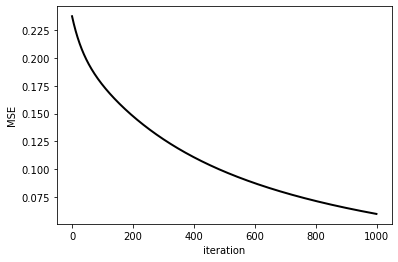

In [5]:
plt.plot(errors, color='k', linewidth=2)
plt.xlabel("iteration")
plt.ylabel("MSE")

plt.show()

In [6]:
x_test = np.array([[0.0, 0.0],
                    [1.0, 0.0],
                    [0.0, 1.0],
                    [1.0, 1.0]])

for x_test_item in x_test :
    y_test = np.dot(x_test_item, W) + b
    y_test = 1/(1 + np.exp(-y_test))
    
    print('%.1f\t' % x_test_item[0] + ' AND \t' + '%.1f\t' %x_test_item[1] + ' = ' + '%.1f\t' %y_test)

0.0	 AND 	0.0	 = 0.0	
1.0	 AND 	0.0	 = 0.2	
0.0	 AND 	1.0	 = 0.2	
1.0	 AND 	1.0	 = 0.6	


W:[1.7820535 1.7820535]
b:-2.960488068885769
plot_y: [1.861279 0.461279]


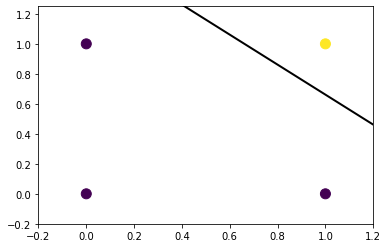

In [7]:
# plot lineary separable class (logic AND)
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])

plot_y = - 1 / W[1] * (W[0] * plot_x + b) 
 
print('W:' + str(W))
print('b:' + str(b))
print('plot_y: '+ str(plot_y))
 
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

___
___
___

# Multi Layer Perceptron menggunakan Keras

___
___
___


![](resource/iris-species.png)
### Iris Dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems.

- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).

Label description :
- Id
- SepalLengthCm : Length of the sepal (in cm)
- SepalWidthCm : Width of the sepal (in cm)
- PetalLengthCm : Length of the petal (in cm)
- PetalWidthCm : Width of the petal (in cm)
- Species : Species name (target data)

Dataset :https://www.kaggle.com/uciml/iris

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris_df = pd.read_csv("datasets_19_420_Iris.csv") 

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_df.drop('Id', axis=1, inplace=True)

In [6]:
IrisGroupedClass = iris_df['Species'].value_counts()

In [7]:
IrisGroupedClass

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

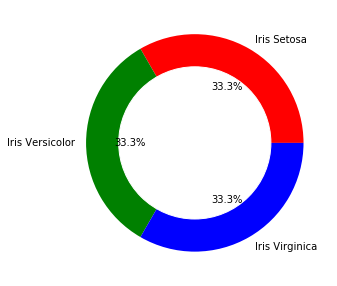

In [8]:
plt.figure(figsize=(10,5))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(IrisGroupedClass, 
        labels=['Iris Setosa','Iris Versicolor', 'Iris Virginica'], 
        colors=['red','green', 'blue'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

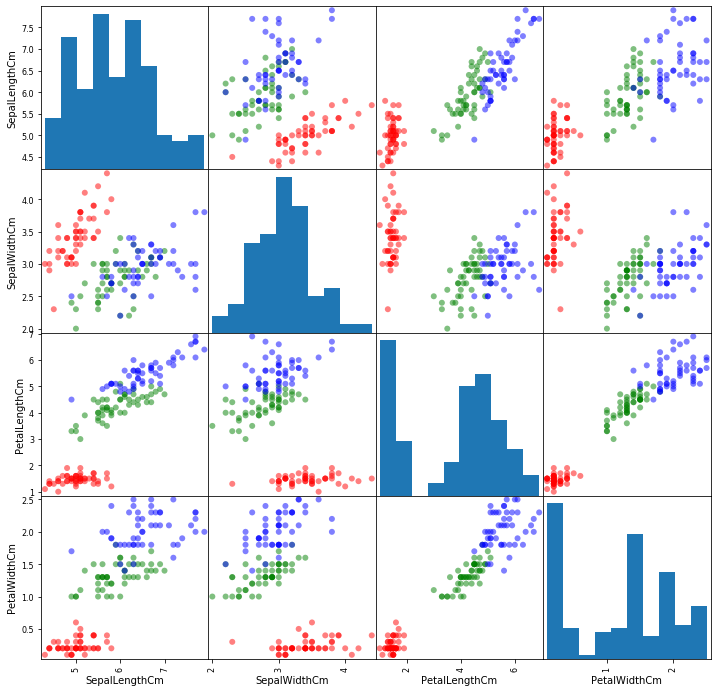

In [9]:
prop = {'Iris-setosa' : 'red',
        'Iris-versicolor' : 'green', 
        'Iris-virginica' : 'blue'}
color = [ prop[item] for item in iris_df['Species'].values]

ax = pd.plotting.scatter_matrix(iris_df, figsize=(12, 12), marker='o', c=color)

___

![](resource/sklearn.PNG)

In [10]:
import os
# disable GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from keras.utils import to_categorical


Using TensorFlow backend.


- Define input & ouput vector
- Encode categorical label into numerical value using `LabelEncoder()`

In [12]:
X = iris_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values

In [13]:
le = LabelEncoder()
le.fit(iris_df["Species"].values)
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
Y = le.transform(iris_df["Species"].values)
Y = to_categorical(Y)

- split dataset with split ratio 75% train , 25% test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

![](resource/keras.PNG)

- Keras API : https://keras.io/api/


- Membuat model pad Keras :
```
from keras.models import Sequential
model = Sequential()
model.add(...)
model.add(...)
model.add(...)
```


- Add input layer pada Keras : **Layer pertama** pada Keras harus menyertakan `input_dim` atau `input_shape`,
```
Dense(16, input_dim=8)
```


- Hidden layer & Activation Layer
```
Dense(16, activation='relu')
```
- atau dapat ditulis sebagai berikut secara terpisah :
```
Dense(16)
Activation("relu")
```


- config network menggunakan `model.compile()`
    - loss 
    - optimizer
    - metric
    
```
    model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics = ['accuracy', precision, recall])
```


- training model :
```
model.fit(X, y, epochs=, batch_size=)
```

- menggunakan Keras untuk membuat model Multi Layer Perceptron

In [17]:
from keras.models import Sequential

from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import Input
from keras.models import Model

import keras
from keras import backend as K

In [18]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [19]:
def mlp_model(max_len):
    
    model = Sequential()
    
    model.add(Dense(16, 
                    input_shape=(max_len,)))
    model.add(Dense(32, activation= 'relu'))
    model.add(Dense(8, activation= 'relu'))
    model.add(Dense(3))
    model.add(Activation("softmax"))
    
    # print model network
    model.summary() 
    
    # config model : add optimizer, loss & metrics
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy', precision, recall])

    return model

## optimizer,  loss, metrics

- Saat melakukan proses training, model parameter (weight) akan diupdate agar mendapatkan nilai `loss` yang minimal dan menghasilkan prediksi yang benar sebanyak mungkin yang dapat ditunjukan oleh `metric`, 
- Namun bagaimana cara mengubah parameter pada model? seberapa besar harus diubah? maka dari itu hadirlah `optimizer`.
- `Optimizer` melakukan update pada model parameter berdasarkan output `loss` function.
- `loss` memberitau `optimizer` apakah ia bergerak kearah yang benar atau tidak.

### ilustrasi 

> `Optimizer` dan `loss` bisa dibayangkan sebagai karyawan yang baru pertama kali datang ke kantor. 
Hari pertama, dia coba menggunakan kereta untuk sampai ke kantor yang ternyata menempuh sekitar 2 jam. 
Di hari berikutnya dia mendapatkan kabar dari rekannya bahwa bus juga dapat mengantarkan kita ke kantor, dia coba naik bus, dan ternyata memakan waktu 1.5jam. 
Besoknya lagi dia diberi info oleh rekan nya yang lain jika menggunakan taxi bisa lebih cepat, sehingga hari itu naik taxi untuk sampai kantor dan dapat ditempuh hanya dalam waktu 1 jam.
- `Optimizer` adalah cara menuju kantor, sedangkan `loss` adalah durasi untuk sampai kantor.


### Jenis Optimizer di Keras
- SGD
- RMSprop
- Adam
- Adadelta
- Adagrad
- Adamax
- Nadam
- Ftrl

#### Perbandingan performace antar optimizer
![](resource/Optimizer-neural-networks-on-MNIST.png)
(sumber [link](https://www.researchgate.net/figure/Comparison-of-different-optimizer-by-training-of-multilayer-neural-networks-on-MNIST_fig1_324808725))

#### SGD vs Adam Optimizer
- SGD Optimizer
```
tf.keras.optimizers.SGD(
    learning_rate=0.01, 
    momentum=0.0, 
    nesterov=False, 
    name="SGD", 
    **kwargs
)
```
- update weight pada SGD saat momentum = 0.0
```
w = w - learning_rate * g
```
- update weight pada SGD saat momentum > 0.0
```
velocity = momentum * velocity - learning_rate * g
w = w * velocity
```
- `momentum` : mempercepat penurunan gradien ke arah yang relevan dan mengurangi osilasi.
\

- Adam Optimizer (adaptive moment estimation)
```
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)
```
- `Adam` compute adaptive learning rates for each parameter using first and second moment of gradien.
- `Adam` memiliki kemampuan fast convergency 
![](resource/saddle.gif)
(sumber [link](https://rnrahman.com/blog/visualising-stochastic-optimisers/))
- Animasi diatas menunjukan prilaku optimizer pada saddle point.
- `SGD` stuck dan sulit untuk bergerak kearah minimum
- Sementara optimizer dengan adaptive learning rate seperti `Adam` sangat cepat untuk turun ke karah minimum 


### Jenis Loss Di Keras
- **Probabilistic losses**
    - BinaryCrossentropy class
    - CategoricalCrossentropy class
- **Regression losses**
    - MeanSquaredError class
- selengkapnya : https://keras.io/api/losses/

### Jenis Metric di Keras
- **Accuracy metrics**
    - Accuracy class 
- ~~**Classification metrics based on True/False positives & negatives**~~ 
    - ~~Precision class~~ 
    - ~~Recall class~~
- Precision & Recall di hilagkan dari `keras` 2.0 keatas [sumber](https://github.com/keras-team/keras/wiki/Keras-2.0-release-notes)
- selengkapnya : https://keras.io/api/metrics/

- lakukan training dengan menggunakan `model.fit()` 

In [20]:
def check_model(model_, x, y, x_val, y_val, epochs_, batch_size_):

    hist = model_.fit(x, 
                      y,
                      epochs=epochs_,
                      batch_size=batch_size_,
                      validation_data=(x_val,y_val))
    return hist 

- call function `check_model()` dan `mlp_model()`
- jalankan training dengan `EPOCHS` dan `BATCH_SIZE` yang telah diset.


- `BATCH_SIZE` merupakan banyaknya sample yang akan di propagasikan kedalam Network
- Benefit menggunakan `BATCH_SIZE` < training sample
    - less memory to consume : karena menggunakan sedikit data saat diproses dalam network
    - network lebih cepat melakukan proses learning 
- Penggunaan `BATCH_SIZE` terlalu kecil dapat mengakibatkan gradient update fluktuatif
- 1 `EPOCH` artinya 1 forwardpass dan backwardpass untuk keseluruhan training sample
- Jumlah `ITERASI` banyaknya forwardpass dan backwardpass untuk tiap `BATCH_SIZE`


- contoh :
    - kita memiliki 1000 training sample
    - kita pilih `BATCH_SIZE` 10 dan `EPOCH` 5
    - sehingga pada tiap `EPOCH` akan dilakukan forwardpass dan backwardpass untuk 1000 training sample yang dibagi meenjadi 10 batch, dimana tiap batch nya akan diproses 100 sample.
    - Proses ini akan menghasilkan setidaknya 100x5 iterasi (forwardpass dan backwardpass).

In [21]:
max_len = X_train.shape[1]  

EPOCHS = 50
BATCH_SIZE = 8

model = mlp_model(max_len)
history=check_model(model, X_train,y_train,X_test,y_test, EPOCHS, BATCH_SIZE)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 915
Trainable params: 915
Non-trainable params: 0
_________________________________________________________________
Train on 112 samples, validate on 38 samples
Epoch 1/50
112/112 [==============================] - 1s 6ms/step - loss: 1.0

112/112 [==============================] - 0s 500us/step - loss: 0.1329 - accuracy: 0.9554 - precision: 0.9554 - recall: 0.9554 - val_loss: 0.1074 - val_accuracy: 0.9737 - val_precision: 0.9750 - val_recall: 0.9750
Epoch 33/50
112/112 [==============================] - 0s 491us/step - loss: 0.1462 - accuracy: 0.9375 - precision: 0.9375 - recall: 0.9375 - val_loss: 0.1020 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 34/50
112/112 [==============================] - 0s 549us/step - loss: 0.1282 - accuracy: 0.9643 - precision: 0.9643 - recall: 0.9643 - val_loss: 0.1286 - val_accuracy: 0.9211 - val_precision: 0.9250 - val_recall: 0.9250
Epoch 35/50
112/112 [==============================] - 0s 491us/step - loss: 0.1715 - accuracy: 0.9375 - precision: 0.9375 - recall: 0.9375 - val_loss: 0.1349 - val_accuracy: 0.9474 - val_precision: 0.9500 - val_recall: 0.9500
Epoch 36/50
112/112 [==============================] - 0s 848us/step - loss: 0.1437 - accuracy: 0.9554 -

- Plot history accuracy , precision dan recall untuk training set dan validation set 

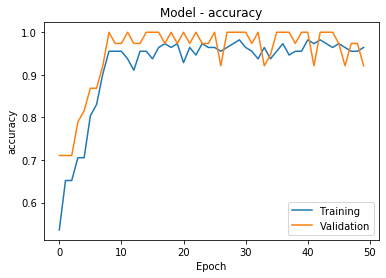

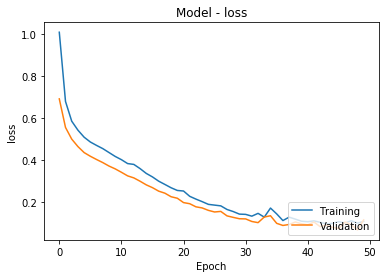

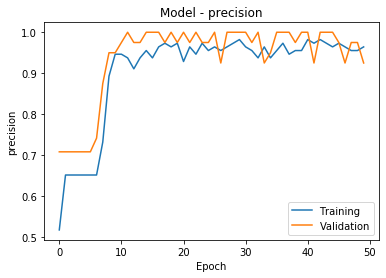

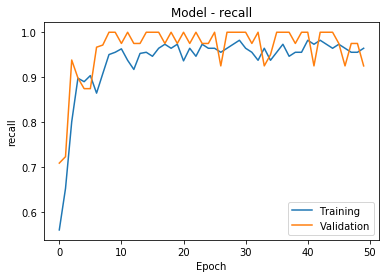

In [22]:
def evaluate_model_(history):
    names = [['accuracy', 'val_accuracy'], 
             ['loss', 'val_loss'], 
             ['precision', 'val_precision'], 
             ['recall', 'val_recall']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.show()
        
evaluate_model_(history)

- pada plot accuracy untuk validation data terlihat lebih **fluktuatif**, apakah ini normal?
- ini bisa diakibatkan oleh `BATCH_SIZE` yang **terlalu kecil**, seperti contohnya jika pada dataset terdapat misslabeled data yang mengakibatkan nilai loss meningkat atau menjauhkannya dari local minima.
- efek ini bisa dihindari jika kita memilih `BATCH_SIZE` lebih besar. 
- Namun `BATCH_SIZE` yang **terlalu besar** dapat mengakibatkan **training** process menjadi lebih berat dan **lambat**.
- selain itu `BATCH_SIZE` **terlalu besar** akan mengakibatkan **generalization** pada model menjadi **jelek** (sumber [link](https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e#:~:text=large%20batch%20size%20means%20the,all%20about%20the%20same%20size.))
- **Generalization** merupakan salah satu kemampuan Neural Network yang artinya model mampu mengklasifikasikan data yang tidak pernah dilihat sebelumnya (*unseen data*) (sumber [link](http://www.eie.polyu.edu.hk/~enzheru/snns/SNNSinfo/UserManual/node16.html#:~:text=Learning%20in%20Neural-,Generalization%20of%20Neural%20Networks,it%20has%20never%20seen%20before.))

- Define function to Calculate & Plot Confusion Matrix

In [23]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

- Predict test dataset
- plot confusion matrix

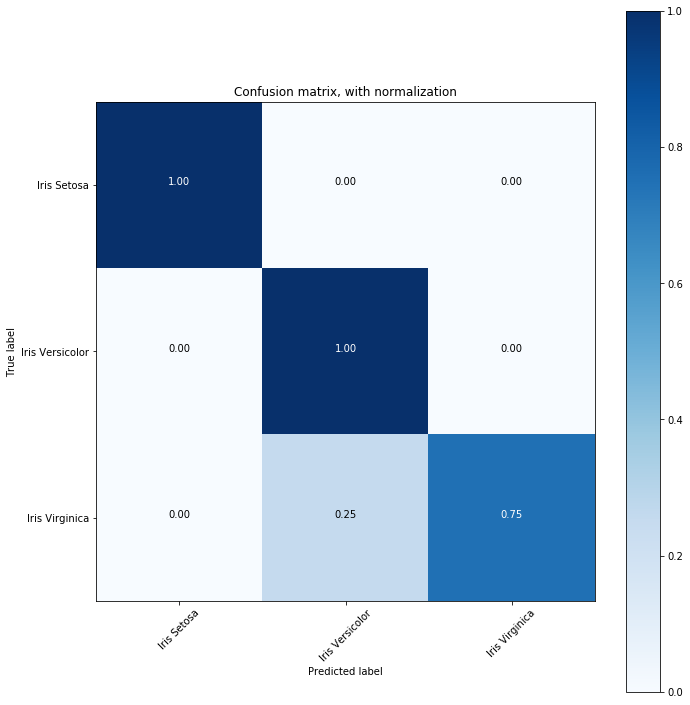

In [24]:
# predict test data
y_pred=model.predict(X_test)


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=['Iris Setosa','Iris Versicolor', 'Iris Virginica'],normalize=True,
                      title='Confusion matrix, with normalization')


- Calculate metric report menggunakan `classification_report()` pada `scikit-learn` 

In [25]:
print(classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=['Iris Setosa','Iris Versicolor', 'Iris Virginica']))

                 precision    recall  f1-score   support

    Iris Setosa       1.00      1.00      1.00        15
Iris Versicolor       0.79      1.00      0.88        11
 Iris Virginica       1.00      0.75      0.86        12

       accuracy                           0.92        38
      macro avg       0.93      0.92      0.91        38
   weighted avg       0.94      0.92      0.92        38



- Terlihat jika `recall` pada class `Iris Veriscolor` rendah (0.36), sedangkan `precision` nya tinggi (1.00)
- Dengan kata lain hanya 36%  `Iris Veriscolor` yang berhasil diprediksi sebagai  `Iris Veriscolor`,

- Namun demikian dari hasil prediksi `Iris Veriscolor` 100% merupakan `Iris Veriscolor`

- Konsep Precision & Recall

![](resource/prec-rec-v3.png)

___

### Selanjutnya ?
- Meningkatkan Accuracy, Precission & Recall

### Tips&Trik?
- Naikan `BATCH_SIZE` hingga **fluktuasi** pada `validation accuracy` menjadi lebih **sedikit**.
- Naikan `EPOCH` sampai network berhenti belajar (loss konstan)
- Naikan Jumlah Neuron tiap layer dengan pattern 
    - 16 - 64 - 32 - 3
    - 32 - 64 - 16 - 3  
    - 64 - 128 - 32 - 3
    - etc.
- Naikan Jumlah Hidden layer
- Ubah `learning rate` pda `Optimizer` menjadi lebih **kecil**, efeknya sama dengan menambahkan `BATCH_SIZE` lebih banyak,
- `Optimizer Adam` lebih baik dari `SGD` dikebanyakan kasus, cepat dalam **convergency** (menemukan global minima pada gradient) 
- Variasikan `training data` vs `test data`, default 75% training data, 25% test data / validation data
- Jika terjadi `overfitting` (model memahami training dataset terlalu dalam) :
    - turunkan kompleksitas model (ambil lebih sedikit jumlah neuron dan hidden layer)
    - Gunakan Teknik Regularization : menurunkan kompleksitas model dan dapat menurunkan variance tanpa terjadi peningkatan bias 
        - Terapkan teknik `EarlyStoping()` , training model dihentikan sesaat sebelum terjadi overfitting
        - Data Augmentation (up samping) atau jika memungkinkan ambil lagi dataset yang lebih banyak
        - Droput : mematikan beberapa neuron saat proses training secara acak (probabilistik)
        - L2 & L1 regularization
    
- Ciri-ciri `overfitting` : validation loss >> training loss



- Jika terjadi `underfitting` : naikan kompleksitas model. hal ini diakibatkan oleh model yang tidak mampu mendapatkan cukup informasi dari dataset yang diberikan karena terlalu sederhana, ciri-cirinya low variance tapi high bias. 
- Ciri-ciri `undefitting` : validation loss << training loss


### Trik lainya yang berkenaan dengan dataset :

- Fix dataset, lakukan preprocessing (cleansing, aggregating, ordering, dll)
- Reduce class imbalance
- Reduce miss labeling
- Gunakan dataset yang cukup
- gunakan `train_test_split()` pada `scikir-learn` untuk memisahkan test dan training set dengan `random_state=42`



- Berikut tulisan yang cukup membantu : https://www.kdnuggets.com/2017/08/37-reasons-neural-network-not-working.html


### Menambahkan Layer vs Menambahkan Neuron

- 1 layer 10 neuron atau 3 layer dengan 5 - 3 - 2 neuron pada tiap layer?

- Pada kasus sederhana seperti kasus klasifikasi biner yang lineary sparable, 1 hidden layer sudah cukup, penambahan layer tidak akan terlalu bermanfaat. Sehingga 1 layer dengan 10 neuron lebih baik.

- Pada kasus lebih kompleks dengan multiclass classification untuk data yang non-lineary sparable, perlu lebih dari 1 hidden layer agar network mampu memahami data dengan baik.
- `Underfitting` dan `overfitting` terjadi pada jenis permasalahan seperti ini, jika network terlalu sederhana maka `underfitting` , jika network terlalu kompleks `overfitting`.



### Evaluasi secara visual menggunakan Tensorboard

[Tensorflow Neural Network Playground](http://playground.tensorflow.org/#activation=sigmoid&batchSize=19&dataset=gauss&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=6,2&seed=0.21068&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) 

### Result
- Terlalu sedikitnya **layer** pada Neural Network membuatnya sulit untuk mempelajari training set dan dapat memicu **Undefitting**
- Terlalu banyak **neuron** pada Neural Network membuatnya terlalu mengenal training set dan kesulitan ketika dihadapkan pada *unseen data* yang dapat memicu  **Overfitting** 

![](resource/under-over-fitting.png)

___
___
___



![](resource/hearth.jpg)

### Heart Disease UCI Dataset
Dataset : https://www.kaggle.com/ronitf/heart-disease-uci

Label description :
- age - age in years
- sex - (1=male,0=female)
- cp = chest pain
    - Typical angina: chest pain related decrease blood supply to the heart
    - Atypical angina: chest pain not related to heart
    - Non-anginal pain: typically esophageal spasms (non heart related)
    - Asymptomatic: chest pain not showing signs of disease
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    - anything above 130-140 is typically cause for concern
- chol - serum cholestoral in mg/dl
- serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
- restecg - resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
    - looks at stress of heart during excercise
    - unhealthy heart will stress more
- slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
- ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
- thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
- target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [68]:
Heart_Disease_df = pd.read_csv("datasets_33180_43520_heart.csv")

In [69]:
Heart_Disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [73]:
GroupedClass = Heart_Disease_df["target"].value_counts()

GroupedClass

1    165
0    138
Name: target, dtype: int64

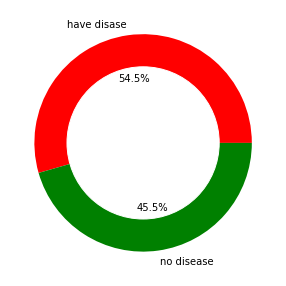

In [74]:
plt.figure(figsize=(10,5))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(GroupedClass, 
        labels=['have disase','no disease'], 
        colors=['red','green'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Perform Data Augmentation menggunakan Pandas (sample) dan Sklearn (subsample)

In [76]:
# sampling and resampling dataset

from sklearn.utils import resample
n_samples = 150

random_states = [42, 123]

dfs = []

for i in range(len(GroupedClass)):
    dfs.append(Heart_Disease_df[Heart_Disease_df["target"] == i])
    if(GroupedClass[i] > n_samples) :
        dfs[i]=dfs[i].sample(n=n_samples ,random_state=random_states[i])
    else :
        dfs[i]=resample(dfs[i],replace=True,n_samples=n_samples,random_state=random_states[i])

Heart_Disease_df=pd.concat(dfs)

In [77]:
GroupedClass = Heart_Disease_df["target"].value_counts()

GroupedClass

1    150
0    150
Name: target, dtype: int64

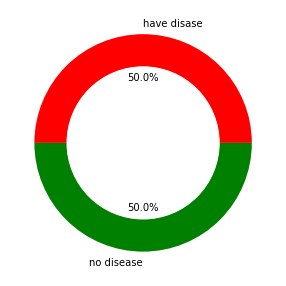

In [78]:
plt.figure(figsize=(10,5))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(GroupedClass, 
        labels=['have disase','no disease'], 
        colors=['red','green'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()